In [1]:
import pandas
from shap.plots import beeswarm, bar, scatter, heatmap
from shap import Explanation
import matplotlib.pyplot as pl
import numpy
import math

In [2]:
bs = 64
num_epochs = 100
prefix = 'basic_nohist_lstm'
T = 0

In [3]:
shap_df = pandas.read_csv(f'../results/{prefix}_bs={bs}_maxep={num_epochs}_acc/T={T}-shap_gradient.csv')

In [4]:
columns = []
shap_columns = []
feature_names = []

for var, var_name, sep in [
    ('reward_vr_fx', 'Reward@VR>FX', '@'), 
    ('change_fx', 'Change@FX', '@'), 
    ('change_vr', 'Change@VR', '@'),
    ('side_probed', 'ProbedSide', '@'), 
    ('stimulus_time', 'StimulusDuration', '@'), 
    ('is_correct', 'IsCorrect', '@'), 
    ('is_wrong', 'IsWrong', '@'),
    ('accrued_score', 'AccruedScore', 'Until'),
]:
    for time in range(T + 1):
        col_name = f"{var}{time}"
        columns.append(col_name)
        shap_columns.append(col_name + '_shap')
        
        if T-time == 0:
            feature_names.append(f'{var_name} {sep} T   ')
        else:
            feature_names.append(f'{var_name} {sep} T-{T-time}')

columns.extend(['sub_emb', 'block_emb'])
feature_names.extend(['Subject', 'Block'])
shap_columns.extend(['sub_shap', 'block_shap'])

print(shap_df[shap_columns].min().min())
print(shap_df[shap_columns].max().max())


-1.757387911236476
2.570459146714886


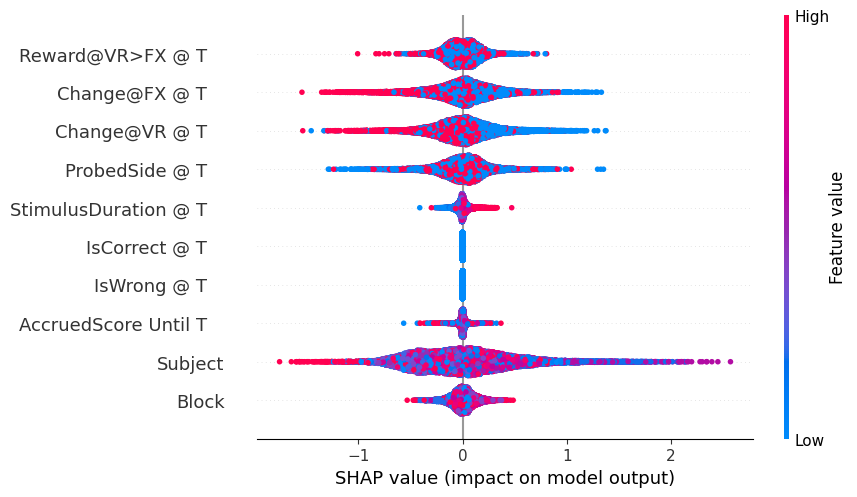

In [5]:
explanation = Explanation(values=shap_df[shap_columns].values,
                          feature_names=feature_names,
                          data=shap_df[columns].values)

beeswarm(explanation, show=False, color_bar=True,
         order=list(range(len(explanation.feature_names))),
         max_display=len(feature_names))
pl.show()


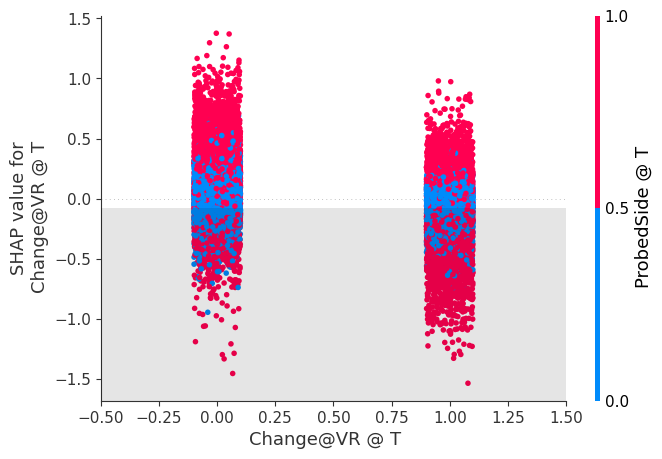

In [8]:
scatter(explanation[:, 'Change@VR @ T   '], 
        color=explanation[:, 'ProbedSide @ T   '], 
        show=False)
pl.show()

In [ ]:
heatmap(explanation[:, ['Change@FX @ T   ', 'Change@VR @ T   ',]])

In [6]:
# shap_columns = []
# feature_names = []

# for var, var_name in [
#     ('reward_vr_fx', 'Reward@VR>FX'), 
#     ('change_fx', 'Change@FX'), 
#     ('change_vr', 'Change@VR'),
#     ('side_probed', 'ProbedSide'), 
#     ('stimulus_time', 'StimulusDuration'), 
#     ('is_correct', 'IsCorrect'), 
#     ('is_wrong', 'IsWrong'),
#     ('accrued_score', 'AccruedScore'),
# ]:
#     shap_columns.append(var + '_shap')
#     feature_names.append(var_name)

# explanation = Explanation(values=shap_df[shap_columns].values,
#                       feature_names=feature_names)

# beeswarm(explanation, show=False,
#          order=list(range(len(explanation.feature_names))),
#          max_display=len(feature_names))
# pl.show()


In [7]:
# shap_columns = []
# feature_names = []

# for time in range(0, T+1):
#     shap_columns.append(f't{time}_shap')
#     if T-time == 0:
#         feature_names.append(f'T   ')
#     else:
#         feature_names.append(f'T-{T-time}')

# print(shap_df[shap_columns].min().min())
# print(shap_df[shap_columns].max().max())


In [8]:
# explanation = Explanation(values=shap_df[shap_columns].values,
#                       feature_names=feature_names)

# beeswarm(explanation, show=False,
#          order=list(range(len(explanation.feature_names))),
#          max_display=len(feature_names))
# pl.xlim([-4.77, 2.21])
# pl.show()